**Loading the digits dataset and running preliminary data
analysis on it as following:**



*   **Data and target shapes**
*   **Number of samples and features**
*   **Range, scale and variance of values**
*   **An example digit in the dataset with it's corresponding target label**
*   **Plotting a histogram for 4 features**
*   **Plotting (feature1, feature2) for 3 different digits**

Shapes:
Dataset shape: (1797, 64)
Target shape: (1797,) 

Number of samples:  1797
Number of features:  64
Range of values:  0.0 - 16.0
Scale of values:  4.884164579855314 +/- 6.016787548672236
Variance of values:  36.20173240585726 

Example digit in the dataset with its target label:
Digit in dataset: 0
Digit target:


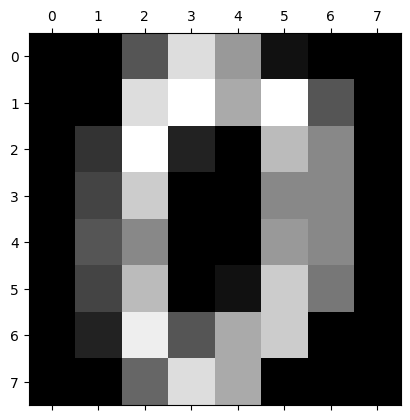

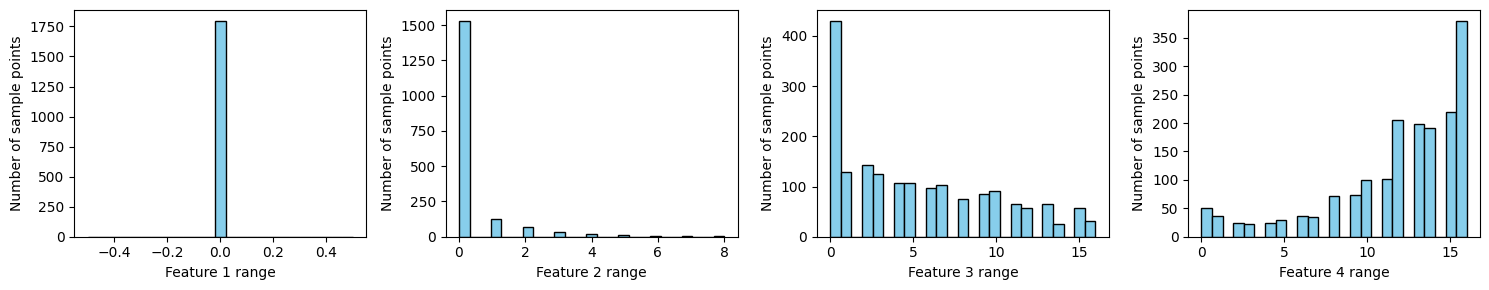

Plot of 2 features for 3 different digits:


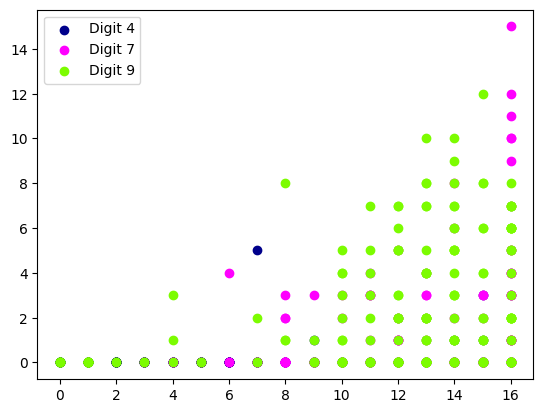

In [11]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits(n_class=10, return_X_y=False, as_frame=False)
X = digits.data
y = digits.target

# Data and target shapes
print("Shapes:")
print("Dataset shape:", np.shape(X))
print("Target shape:", np.shape(y), "\n")

# Number of samples
print("Number of samples: ", X.shape[0])

# Number of features
print("Number of features: ", X.shape[1])

# Range of values
print("Range of values: ", np.min(X), "-", np.max(X))

# Scale of values
print("Scale of values: ", np.mean(X), "+/-", np.std(X))

# Variance of values
print("Variance of values: ", np.var(X), "\n")

# Example digit in the dataset with its target label
print("Example digit in the dataset with its target label:")
print("Digit in dataset:" , y[0])
print("Digit target:")
plt.matshow(digits.images[0], cmap='gray')
plt.show()
print("\n")

# Plotting a histogram for 4 features
num_of_features = 4
fig, axs = plt.subplots(1, num_of_features, figsize=(15, 3))

for i in range(num_of_features):
    axs[i].hist(X[:, i], bins=25, color='skyblue', edgecolor='black')
    axs[i].set_xlabel(f"Feature {i+1} range")
    axs[i].set_ylabel("Number of sample points")

plt.tight_layout()
plt.show()

# Plotting (feature1, feature2) for 3 different digits
print("Plot of 2 features for 3 different digits:")
plt.scatter([X[i][3] for i in range(len(y)) if y[i] == 4],[X[i][9] for i in range(len(y)) if y[i] == 4], color='darkblue', label='Digit 4')
plt.scatter([X[i][3] for i in range(len(y)) if y[i] == 7],[X[i][9] for i in range(len(y)) if y[i] == 7], color='magenta', label='Digit 7')
plt.scatter([X[i][3] for i in range(len(y)) if y[i] == 9],[X[i][9] for i in range(len(y)) if y[i] == 9], color='lawngreen', label='Digit 9')
plt.legend()
plt.show()




1.   **Splitting the data to test-set and train-set, for
each test-size ratio r ∈ [0.1, 0.2, 0.3, ..., 0.9] using LogisticRegression to
train a logistic regressor on the train-set and evaluating the accuracy on the test-set.**
2.   **Plotting the accuracy of each r (using r as x axis and accuracy as
y axis).**

Accuracy for r= 0.1 is 0.9611111111111111
Accuracy for r= 0.2 is 0.9805555555555555
Accuracy for r= 0.3 is 0.9648148148148148
Accuracy for r= 0.4 is 0.9485396383866481
Accuracy for r= 0.5 is 0.9621802002224694
Accuracy for r= 0.6 is 0.9666357738646896
Accuracy for r= 0.7 is 0.9499205087440381
Accuracy for r= 0.8 is 0.9436717663421419
Accuracy for r= 0.9 is 0.9332509270704573


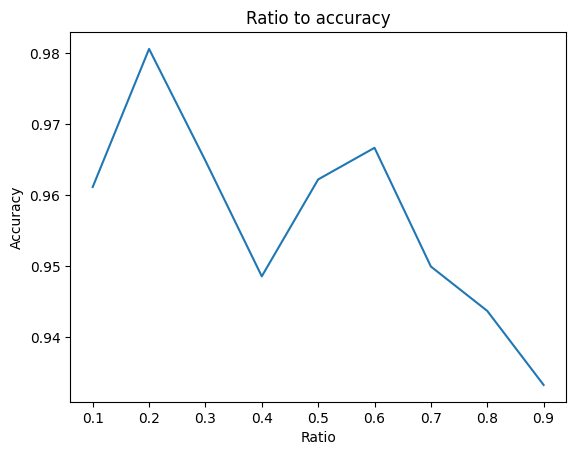

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Splits the data, trains a logistic regressor on the train set and returns the accuracy on the test set given the wanted test size ratio
def accuracy_after_train(ratio, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= ratio)
  #scaling the data in order to promise convergance
  model = make_pipeline(StandardScaler(), LogisticRegression())
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

# Plotting the accuracy of each ratio
def plot_per_ratio(X, y):
  ratio = np.arange(0.1,1,0.1)
  accuracy = []
  for r in ratio:
    acc = accuracy_after_train(r, X, y)
    print("Accuracy for r=", "{:.1f} is".format(r), acc)
    accuracy.append(acc)
    
  plt.plot(ratio, accuracy)
  plt.title("Ratio to accuracy")
  plt.xlabel("Ratio")
  plt.ylabel("Accuracy")
  plt.show()

plot_per_ratio(X,y)

  

**Creating an unbalanced sub-dataset from the original balanced dataset:**

In [18]:
currDigits = digits.data[digits.target == 0]
currTargets = digits.target[digits.target == 0]
index_list = np.random.choice(range(currDigits.shape[0]), size=172, replace=False) 
X_unbalanced = currDigits[index_list]
y_unbalanced = currTargets[index_list]


for i in range(1,10):
  currDigits = digits.data[digits.target == i]
  currTargets = digits.target[digits.target == i]
  index_list = np.random.choice(range(currDigits.shape[0]), size=92, replace=False) 

  X_unbalanced = np.concatenate((X_unbalanced, currDigits[index_list]), axis = 0)
  y_unbalanced = np.concatenate((y_unbalanced, currTargets[index_list]), axis = 0)
  



*   **Generating a new dataset using label balancing on our new sub-dataset.**
*   **Spliting the dataset, training a logistic regressor on it and printing the accuracy on the test set.**




Number of samples of the least appearing label: 92
Accuracy for r= 0.1 is 0.9456521739130435
Accuracy for r= 0.2 is 0.967391304347826
Accuracy for r= 0.3 is 0.9494584837545126
Accuracy for r= 0.4 is 0.9755434782608695
Accuracy for r= 0.5 is 0.9521739130434783
Accuracy for r= 0.6 is 0.9583333333333334
Accuracy for r= 0.7 is 0.9410852713178295
Accuracy for r= 0.8 is 0.9144021739130435
Accuracy for r= 0.9 is 0.8695652173913043


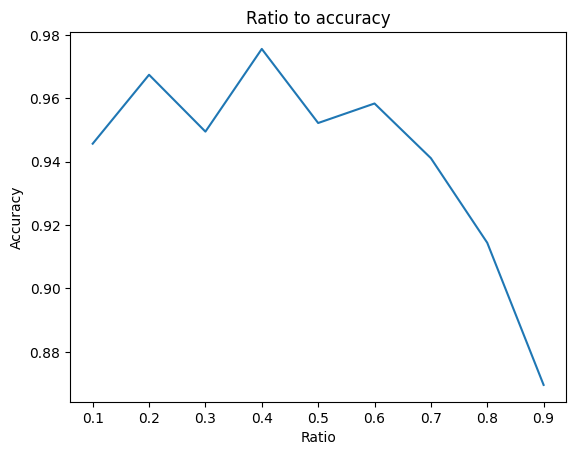

In [14]:
# Finding the number, l_min, corresponding to the label that appears the least in the data
l_min = 1000
for i in range(10):
  curr_digit = X_unbalanced[y_unbalanced == i]
  if l_min > len(curr_digit):
    l_min = len(curr_digit)
print("Number of samples of the least appearing label:" , l_min)

# Randomly selecting only l_min samples for each label and adding them to the new dataset
num_samples = l_min
new_data = np.empty((0,64))
new_target = []
for i in range(10):
  index_list = np.random.choice(range(X_unbalanced[y_unbalanced == i].shape[0]), size=num_samples, replace=False)  
  X_balanced = X_unbalanced[y_unbalanced == i][index_list]
  y_balanced = y_unbalanced[y_unbalanced == i][index_list]
  new_data = np.concatenate((new_data, X_balanced), axis=0)
  new_target = np.concatenate((new_target, y_balanced), axis=0)

# Using our previous function (and prev ratios) to split the dataset, train a logistic regressor on it and print the accuracy on the test set:
plot_per_ratio(new_data, new_target)


**Implementing a k-features selection algorithm that returns:**


1.   **The set of k features from the dataset that achive the best accuracy (highest)**
2.    **The accuracy achieved on the test-set**




In [16]:
from itertools import combinations

def k_features_selection(train_set, test_set, k):
  X_tr = train_set[0]
  y_tr = train_set[1]
  X_ts = test_set[0]
  y_ts = test_set[1]

  best_features = []
  max_accuracy = 0

  combs = combinations(range(64), k) # all combinations of k features
  all_combs = [np.array(c) for c in combs] # as arrays

  for comb in all_combs:
    reduced_X_train = X_tr[:, comb] # remove all features but the chosen k features
    reduced_X_test = X_ts[:, comb]

    model = make_pipeline(StandardScaler(), LogisticRegression()) # train our model
    model.fit(reduced_X_train, y_tr)
    
    accuracy =  model.score(reduced_X_test, y_ts) # calculate accuracy on test-set
    if accuracy > max_accuracy : #searching for best accuracy
      max_accuracy = accuracy
      best_features = comb
  
  return (max_accuracy, best_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
max_accuracy, best_features = k_features_selection((X_train, y_train), (X_test, y_test), 2)
print("Features giving the best accuracy on test data:", best_features)
print("Best accuracy on test data:", max_accuracy)


Features giving the best accuracy on test data: [21 42]
Best accuracy on test data: 0.43333333333333335
